# Popularity based Recommendation System

In [65]:
import pandas as pd
import numpy as np

In [67]:
movie_names = pd.read_csv('../../datasets/movies.csv')
movie_names

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary
9123,164977,The Gay Desperado (1936),Comedy


In [69]:
rating_data = pd.read_csv('../../datasets/ratings.csv')
rating_data

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [71]:
movie_data = pd.merge(movie_names, rating_data, on='movieId')
movie_data

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0,851866703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9,4.0,938629179
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,5.0,1331380058
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.0,997938310
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,3.0,855190091
...,...,...,...,...,...,...
99999,161944,The Last Brickmaker in America (2001),Drama,287,5.0,1470167824
100000,162376,Stranger Things,Drama,73,4.5,1474255532
100001,162542,Rustom (2016),Romance|Thriller,611,5.0,1471520667
100002,162672,Mohenjo Daro (2016),Adventure|Drama|Romance,611,3.0,1471523986


In [73]:
movie_data.groupby('title')['rating'].mean().head()

title
"Great Performances" Cats (1998)           1.750000
$9.99 (2008)                               3.833333
'Hellboy': The Seeds of Creation (2004)    2.000000
'Neath the Arizona Skies (1934)            0.500000
'Round Midnight (1986)                     2.250000
Name: rating, dtype: float64

In [75]:
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Ivan Vasilievich: Back to the Future (Ivan Vasilievich menyaet professiyu) (1973)    5.0
Alien Escape (1995)                                                                  5.0
Boiling Point (1993)                                                                 5.0
Bone Tomahawk (2015)                                                                 5.0
Borgman (2013)                                                                       5.0
Name: rating, dtype: float64

In [77]:
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                          341
Pulp Fiction (1994)                          324
Shawshank Redemption, The (1994)             311
Silence of the Lambs, The (1991)             304
Star Wars: Episode IV - A New Hope (1977)    291
Name: rating, dtype: int64

In [79]:
movie_data[['title','rating']]

,title,rating
0,Toy Story (1995),3.0
1,Toy Story (1995),4.0
2,Toy Story (1995),5.0
3,Toy Story (1995),2.0
4,Toy Story (1995),3.0
...,...,...
99999,The Last Brickmaker in America (2001),5.0
100000,Stranger Things,4.5
100001,Rustom (2016),5.0
100002,Mohenjo Daro (2016),3.0


In [81]:
rating_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())
rating_mean_count

,rating
title,
"""Great Performances"" Cats (1998)",1.750000
$9.99 (2008),3.833333
'Hellboy': The Seeds of Creation (2004),2.000000
'Neath the Arizona Skies (1934),0.500000
'Round Midnight (1986),2.250000
...,...
xXx (2002),2.478261
xXx: State of the Union (2005),1.000000
¡Three Amigos! (1986),3.258065


In [83]:
rating_mean_count['rating_count'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())

In [85]:
rating_mean_count

,rating,rating_count
title,,
"""Great Performances"" Cats (1998)",1.750000,2
$9.99 (2008),3.833333,3
'Hellboy': The Seeds of Creation (2004),2.000000,1
'Neath the Arizona Skies (1934),0.500000,1
'Round Midnight (1986),2.250000,2
...,...,...
xXx (2002),2.478261,23
xXx: State of the Union (2005),1.000000,1
¡Three Amigos! (1986),3.258065,31


In [89]:
rating_mean_count['rating'] = round(rating_mean_count['rating'],1)

In [91]:
rating_mean_count

,rating,rating_count
title,,
"""Great Performances"" Cats (1998)",1.8,2
$9.99 (2008),3.8,3
'Hellboy': The Seeds of Creation (2004),2.0,1
'Neath the Arizona Skies (1934),0.5,1
'Round Midnight (1986),2.2,2
...,...,...
xXx (2002),2.5,23
xXx: State of the Union (2005),1.0,1
¡Three Amigos! (1986),3.3,31


In [95]:
rating_mean_count = rating_mean_count[(rating_mean_count['rating'] > 3) & (rating_mean_count['rating_count'] > 100)]

In [101]:
rating_mean_count.sort_values(by='rating', ascending= False)

,rating,rating_count
title,,
"Godfather, The (1972)",4.5,200
"Shawshank Redemption, The (1994)",4.5,311
"Usual Suspects, The (1995)",4.4,201
"Godfather: Part II, The (1974)",4.4,135
Pulp Fiction (1994),4.3,324
...,...,...
Cliffhanger (1993),3.1,106
Dumb & Dumber (Dumb and Dumber) (1994),3.1,158
Home Alone (1990),3.1,129


In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

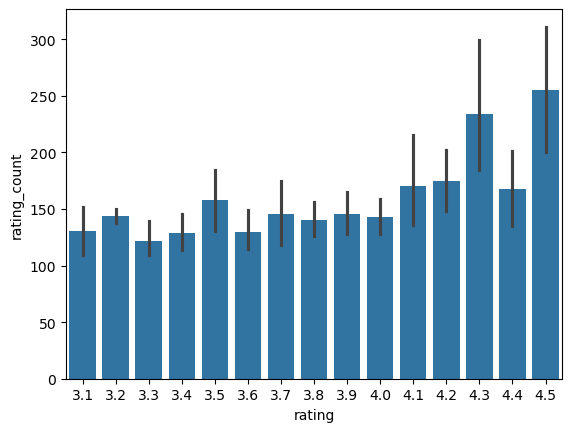

In [113]:
sns.barplot(rating_mean_count, x=rating_mean_count['rating'], y=rating_mean_count['rating_count'])
plt.show()